In [ ]:
%pip install networkx matplotlib tabulate


+--------+-------------------+----------------+
| Task   |   Duration (Days) | Dependencies   |
+========+===================+================+
| Task A |                 5 | -              |
+--------+-------------------+----------------+
| Task B |                 4 | Task A         |
+--------+-------------------+----------------+
| Task C |                 6 | Task A         |
+--------+-------------------+----------------+
| Task D |                 3 | Task B, Task C |
+--------+-------------------+----------------+
| Task E |                 2 | Task D         |
+--------+-------------------+----------------+
| Task F |                 5 | Task C         |
+--------+-------------------+----------------+
| Task G |                 3 | Task D         |
+--------+-------------------+----------------+
| Task H |                 4 | Task F, Task G |
+--------+-------------------+----------------+

Critical Path:
 - Task A
 - Task B
 - Task C
 - Task D
 - Task E
 - Task F
 - Task G
 -

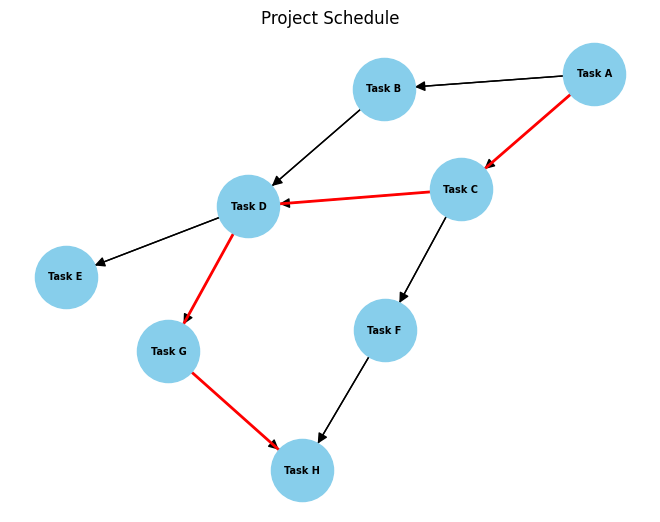

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate
import textwrap

def create_project_schedule():
    # Define modest tasks, durations, and dependencies
    tasks = {
        "Task A": {"duration": 5, "dependencies": []},
        "Task B": {"duration": 4, "dependencies": ["Task A"]},
        "Task C": {"duration": 6, "dependencies": ["Task A"]},
        "Task D": {"duration": 3, "dependencies": ["Task B", "Task C"]},
        "Task E": {"duration": 2, "dependencies": ["Task D"]},
        "Task F": {"duration": 5, "dependencies": ["Task C"]},
        "Task G": {"duration": 3, "dependencies": ["Task D"]},
        "Task H": {"duration": 4, "dependencies": ["Task F", "Task G"]}
    }

    return tasks

def calculate_critical_path(tasks):
    # Create a directed acyclic graph (DAG) using NetworkX
    G = nx.DiGraph()

    for task, data in tasks.items():
        for dependency in data["dependencies"]:
            G.add_edge(dependency, task)

    # Identify source and target nodes for critical path calculation
    sources = [node for node, in_degree in G.in_degree() if in_degree == 0]
    targets = [node for node, out_degree in G.out_degree() if out_degree == 0]

    # Calculate critical path using NetworkX
    all_paths = []
    for source in sources:
        for target in targets:
            paths = list(nx.algorithms.simple_paths.all_simple_paths(G, source=source, target=target))
            all_paths.extend(paths)

    if not all_paths:
        return []

    critical_path = max(all_paths, key=lambda path: sum(tasks[task]["duration"] for task in path))

    return critical_path


def visualize_project_schedule(tasks, critical_path):
    # Create a directed acyclic graph (DAG) using NetworkX for visualization
    G = nx.DiGraph()

    for task, data in tasks.items():
        for dependency in data["dependencies"]:
            G.add_edge(dependency, task)

    # Draw the graph with kamada_kawai_layout
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=2000, node_color="skyblue", font_color="black", font_weight="bold", arrowsize=15)

    # Wrap node texts for better readability
    wrapped_labels = {node: "\n".join(textwrap.wrap(node, width=12)) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=7, font_weight="bold")

    # Highlight critical path edges with a different color and width
    edge_colors = ['red' if edge in zip(critical_path, critical_path[1:]) else 'black' for edge in G.edges()]
    edge_widths = [2 if edge in zip(critical_path, critical_path[1:]) else 1 for edge in G.edges()]

    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, width=edge_widths)

    plt.title("Project Schedule")
    plt.show()


def main():
    tasks = create_project_schedule()
    all_tasks = list(tasks.keys())
    critical_path = calculate_critical_path(tasks)

    # Print task data in tabular format
    headers = ["Task", "Duration (Days)", "Dependencies"]
    task_data = []
        
    for task, data in tasks.items():
        task_data.append([task, data["duration"], ", ".join(data["dependencies"]) if data["dependencies"] else "-"])

    print(tabulate(task_data, headers=headers, tablefmt="grid"))

    print("\nCritical Path:")
    for task in all_tasks:
        print(f" - {task}")

    print("\nVisualizing Project Schedule:")
    visualize_project_schedule(tasks, critical_path)

if __name__ == "__main__":
    main()
